In [212]:
import find_source
from find_source import summary, significant
import glob
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np

In [213]:
#summary('../data/11151/l1551-51.fits', False, False, True, '../paper_figs')

In [214]:
#summary('../data/1407+2827.fits', False, False, True, '../paper_figs')

In [215]:
#summary('../data/11151/3c279.fits', False, False, True, '../paper_figs')

In [216]:
#files = []
#for file in glob.glob('../data/*.fits'):
#    files.append(file)
#files.sort()
#results = []
#for file in files:
#    try:
#        results.append(significant(file, 0.095))
#    except Exception:
#        pass
#for res in results:
#    print(res)

In [217]:
thresholds = [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1]
false_positives = [0,0,1,1,1,2,3,3,3,4,4,4,4,6,6,6,6,6,6,7]
expected_false_positives = [ele * 97 for ele in thresholds]

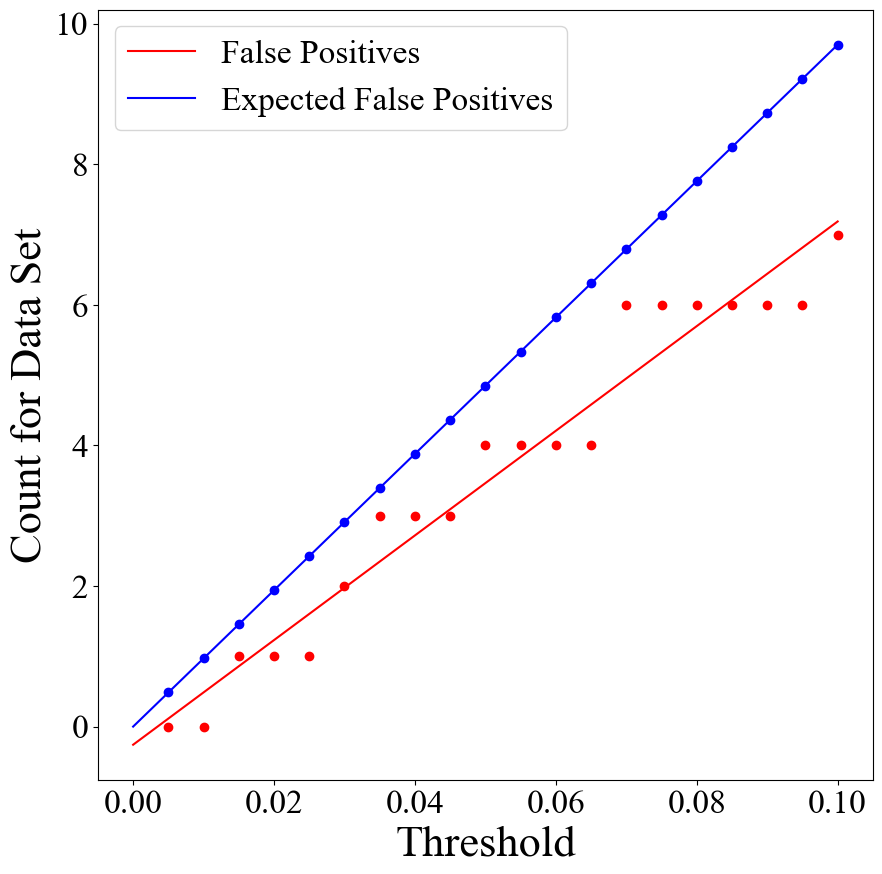

False Positives:
y=74.44x-0.26, R^2=0.95
False Positives:
y=97.00x0.00, R^2=1.0


In [218]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 24

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(thresholds, false_positives, color='r')
fp_slope, fp_intercept, fp_r_value, fp_p_value, fp_std_err = stats.linregress(thresholds, false_positives)
x= np.linspace(0,0.10,100)
fp_y = fp_slope * x + fp_intercept
plt.plot(x, fp_y, color='r', label='False Positives')

plt.scatter(thresholds, expected_false_positives, color='b')
efp_slope, efp_intercept, efp_r_value, efp_p_value, efp_std_err = stats.linregress(thresholds, expected_false_positives)
efp_y = efp_slope * x + efp_intercept
plt.plot(x, efp_y, color='b', label='Expected False Positives')

plt.legend()
plt.xlabel('Threshold', fontsize=32)
plt.ylabel('Count for Data Set', fontsize=32)
plt.show()

print(f'False Positives:\ny={fp_slope:.2f}x{fp_intercept:.2f}, R^2={fp_r_value**2:.2f}')
print(f'False Positives:\ny={efp_slope:.2f}x{efp_intercept:.2f}, R^2={efp_r_value**2}')